**The following notebook utilizes data from the iris sklearn dataset. This code was used to answer a series of questions related to this dataset**

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.cluster import KMeans, kmeans_plusplus
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.datasets import load_iris as iris
data = iris()

In [2]:
from intro_Data_5 import*

In [3]:
X = data.data
X_names = data.feature_names
y = data.target
y_names = data.target_names
iris_df = pd.DataFrame(X, columns = X_names)


In [4]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
newX = np.array(X)

In [9]:
#question 8 

In [10]:
X= iris_df.values

km = KMeans(n_clusters=3, random_state=146) #K-means++ initialization is used by default
km.fit(X) # what is this doing?

KMeans(n_clusters=3, random_state=146)

In [11]:
km.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [12]:
groups = km.predict(X)
groups

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

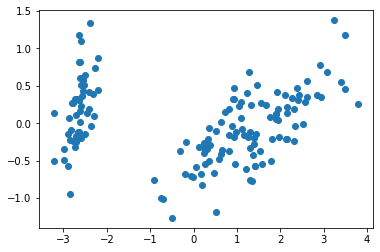

In [13]:
pca = PCA(n_components=2)
pca_X = pca.fit_transform(X)
plt.scatter(pca_X[:,0], pca_X[:,1])

/Users/carolinefrida/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/carolinefrida/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


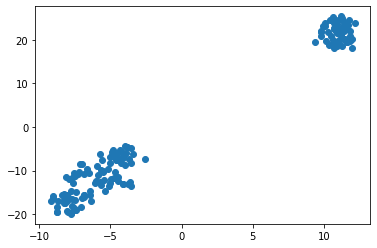

In [14]:
tsne = TSNE(random_state = 146)
tsne_X = tsne.fit_transform(X)
plt.scatter(tsne_X[:,0], tsne_X[:,1])

In [15]:
#Let's try 3 and shade in the points on PCA and tSNE
km = KMeans(n_clusters=3, n_init=10)
km.fit(X)

KMeans(n_clusters=3)

In [16]:
groups = km.predict(X)
groups

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [17]:
km.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

(<Figure size 432x432 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

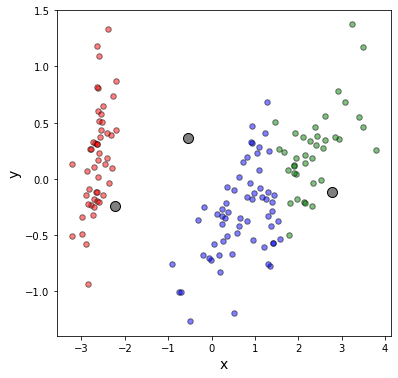

In [18]:
fig,ax = plot_groups(pca_X, groups, colors = ['red','blue','green'], labels = ['PC1','PC2'], alpha = 0.5)
plot_groups(pca.fit_transform(km.cluster_centers_), np.unique(groups), colors = ['grey']*3, ax=ax, s= 100,
           alpha = 1)

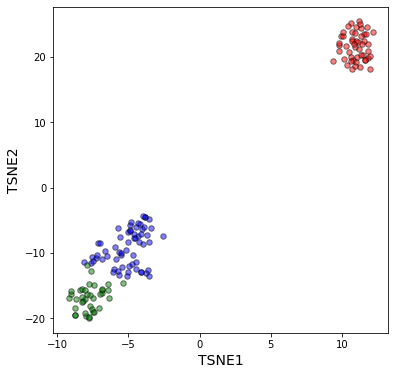

In [19]:

fig, ax = plot_groups(tsne_X, groups, colors = ['red','blue','green'], labels = ['TSNE1','TSNE2'], alpha = 0.5)

# plt.xticks([])
# plt.yticks([])

In [20]:
groups
real_groups = y
real_groups

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
conf_matrix, accuracy = compare_classes(real_groups, groups)
conf_matrix

Test accuracy = 0.89


Predicted,0,1,2
Actual,,,
0,50,0,0
1,0,48,2
2,0,14,36


In [22]:
temp = groups == 0

change = groups == 1
groups[temp] = 1
groups[change] = 0

In [23]:
conf_matrix, accuracy = compare_classes(real_groups, groups)
conf_matrix

Test accuracy = 0.24


Predicted,0,1,2
Actual,,,
0,0,50,0
1,48,0,2
2,14,0,36


In [24]:
from sklearn.preprocessing import StandardScaler as SS
X_ss = SS().fit_transform(iris_df.values)

In [25]:
#Let's try 3 and shade in the points on PCA and tSNE
km = KMeans(n_clusters=3, n_init=10)
km.fit(X_ss)

KMeans(n_clusters=3)

In [26]:
groups = km.predict(X_ss)
groups

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [27]:
groups
real_groups = y
real_groups

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
conf_matrix, accuracy = compare_classes(real_groups, groups)
conf_matrix

Test accuracy = 0.81


Predicted,0,1,2
Actual,,,
0,50,0,0
1,0,39,11
2,0,17,33


In [29]:
temp = groups == 0

change = groups == 1
groups[temp] = 1
groups[change] = 0

In [30]:
conf_matrix, accuracy = compare_classes(real_groups, groups)
conf_matrix

Test accuracy = 0.22


Predicted,0,1,2
Actual,,,
0,0,50,0
1,39,0,11
2,17,0,33


In [31]:
#question 9

In [32]:
from sklearn.preprocessing import StandardScaler as SS
X = SS().fit_transform(iris_df.values)

In [34]:
X = iris.data[iris.target == 0]  # Only keep the first class (setosa)
y = iris.target[iris.target == 0]


In [35]:
#Let's try 3 and shade in the points on PCA and tSNE
km = KMeans(n_clusters=3, n_init=10)
km.fit(X)

KMeans(n_clusters=3)

In [36]:
groups = km.predict(X)
groups

array([2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 1, 2, 0, 0, 1, 1, 1, 2, 1, 2, 2, 2,
       0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 1, 1, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 0, 2, 0, 2, 2], dtype=int32)

In [37]:
groups
real_groups = y
real_groups

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [38]:
conf_matrix, accuracy = compare_classes(real_groups, groups)
conf_matrix

Test accuracy = 0.38


Predicted,0,1,2
Actual,,,
0,19,8,23
